<a href="https://colab.research.google.com/github/DarkLord017/DAIAssignment2/blob/main/Sambhav_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Restaurant Tips Analysis and Prediction

# This notebook performs a comprehensive analysis of restaurant tips data, including:
# - Exploratory Data Analysis (EDA)
# - Statistical Analysis
# - Machine Learning Model Training and Evaluation

### Setup and Imports


In [7]:

# %%
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [8]:
# Machine learning imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


### Data Loading and Initial Exploration


# Load the dataset
# Replace with the actual file ID from your URL

In [9]:
# Configure visualizations


file_id = "1Xkm84DEOHqZ6YNnNP3jzerpUPU6LoCyJ"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Load the dataset
df = pd.read_csv(download_url)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

First few rows:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64



# Exploratory Data Analysis (EDA)

### Let's explore the relationships between different variables in our dataset.



In [11]:

# Set up categorical and numerical columns
categorical_columns = ['sex', 'smoker', 'day', 'time', 'size']
numerical_columns = ['total_bill', 'tip']

# Basic statistics for numerical columns
print("Statistical Summary:")
display(df.describe())

Statistical Summary:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


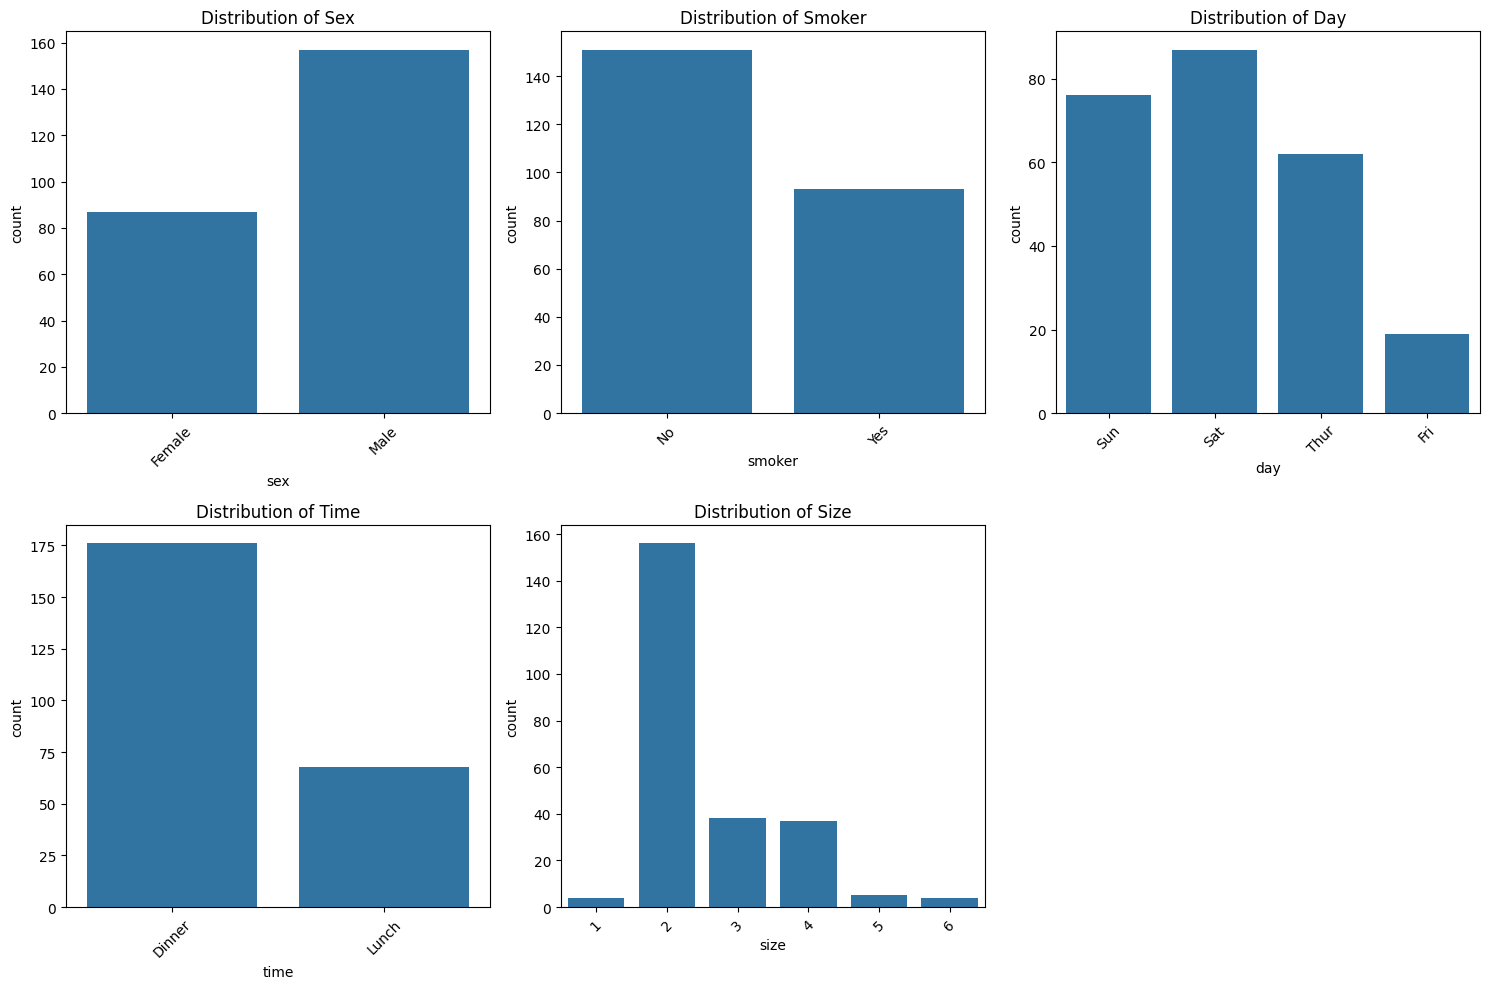

In [12]:



# Create a figure with subplots for categorical variables
plt.figure(figsize=(15, 10))

# Plot distribution of categorical variables
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col.title()}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

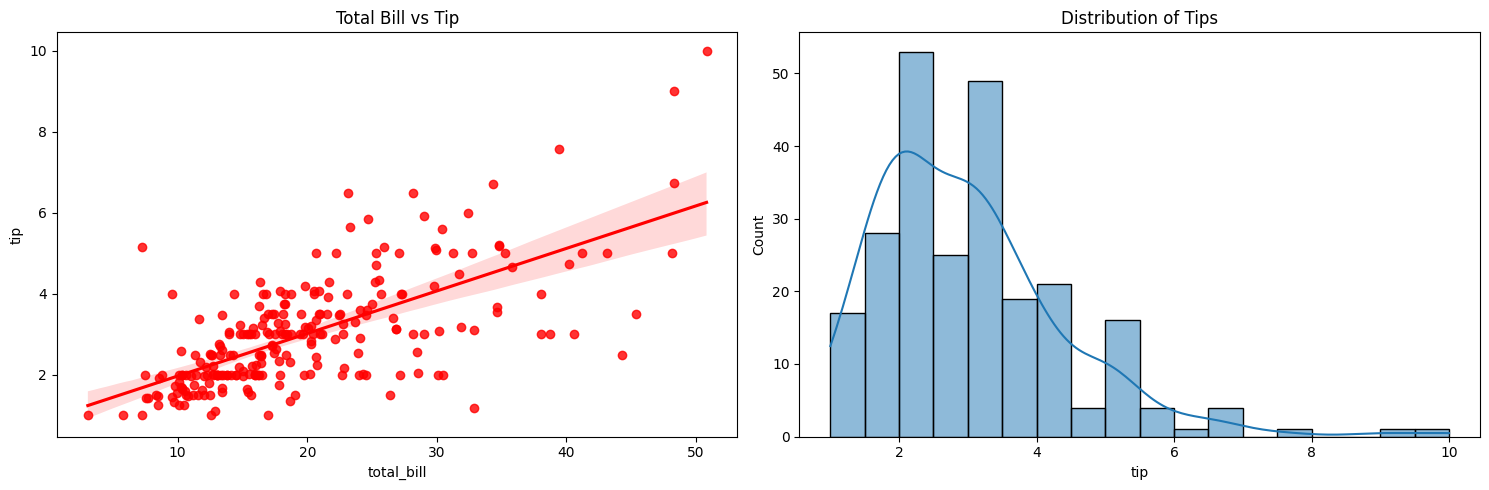

In [13]:


# %%
# Create visualizations for numerical relationships
plt.figure(figsize=(15, 5))

# Total Bill vs Tip relationship
plt.subplot(1, 2, 1)
sns.regplot(x='total_bill', y='tip', data=df, color='red')
plt.title('Total Bill vs Tip')

# Tip distribution
plt.subplot(1, 2, 2)
sns.histplot(df['tip'], kde=True)
plt.title('Distribution of Tips')

plt.tight_layout()
plt.show()



# Distribution of Categorical Variables

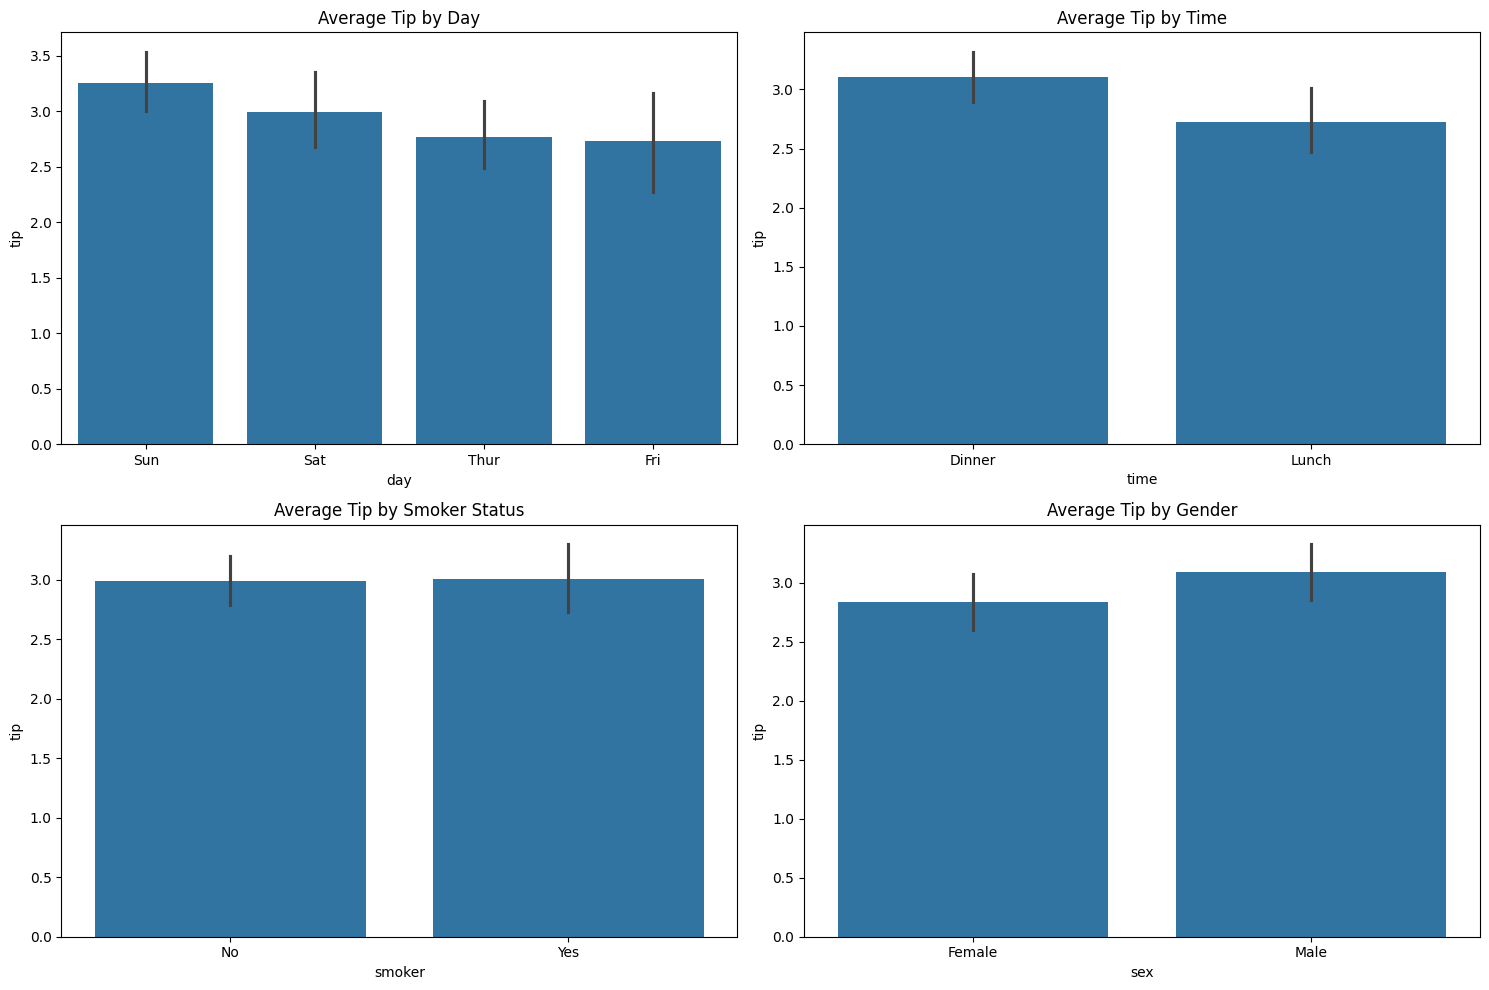

In [14]:
# %% [markdown]
# ### Additional Insights

# %%
# Average tip by different categories
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Average tip by day
sns.barplot(data=df, x='day', y='tip', ax=axes[0,0])
axes[0,0].set_title('Average Tip by Day')

# Average tip by time
sns.barplot(data=df, x='time', y='tip', ax=axes[0,1])
axes[0,1].set_title('Average Tip by Time')

# Average tip by smoker status
sns.barplot(data=df, x='smoker', y='tip', ax=axes[1,0])
axes[1,0].set_title('Average Tip by Smoker Status')

# Average tip by gender
sns.barplot(data=df, x='sex', y='tip', ax=axes[1,1])
axes[1,1].set_title('Average Tip by Gender')

plt.tight_layout()
plt.show()



# Statistical Analysis

In [15]:

#
# Let's perform ANOVA tests to check if there are significant differences in tips based on categorical variables.

# %%
# Perform ANOVA tests
for col in categorical_columns:
    groups = [df['tip'][df[col] == category] for category in df[col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)

    print(f'\nANOVA test for {col}:')
    print(f'F-Statistic: {f_stat:.4f}, p-value: {p_value:.4f}')
    print(f"Result: {'Significant' if p_value < 0.05 else 'Not significant'} "
          f"difference in tips based on {col}")




ANOVA test for sex:
F-Statistic: 1.9262, p-value: 0.1665
Result: Not significant difference in tips based on sex

ANOVA test for smoker:
F-Statistic: 0.0085, p-value: 0.9266
Result: Not significant difference in tips based on smoker

ANOVA test for day:
F-Statistic: 1.6724, p-value: 0.1736
Result: Not significant difference in tips based on day

ANOVA test for time:
F-Statistic: 3.6338, p-value: 0.0578
Result: Not significant difference in tips based on time

ANOVA test for size:
F-Statistic: 15.7463, p-value: 0.0000
Result: Significant difference in tips based on size



# Data Preparation for Modeling

In [16]:


# Encode categorical variables
le = LabelEncoder()
df_encoded = df.copy()

for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

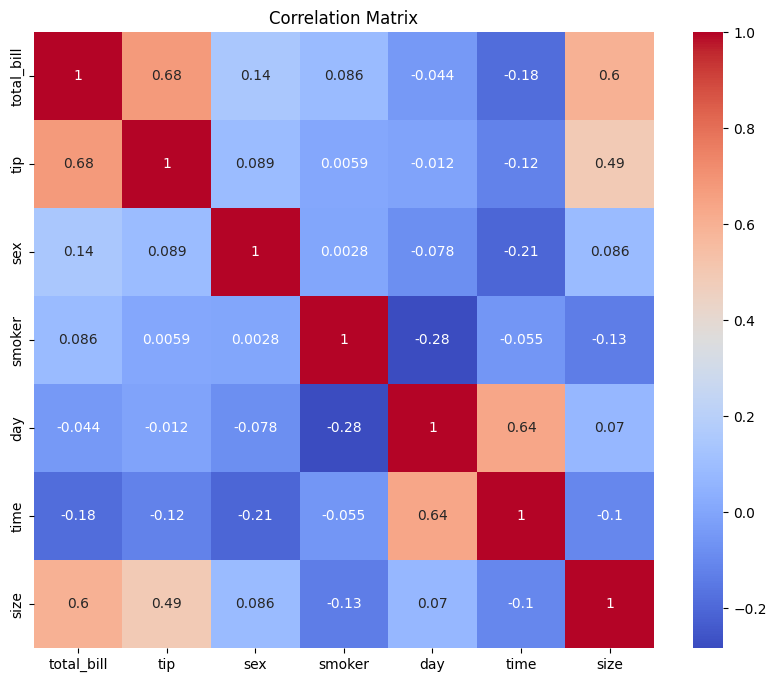

In [17]:
# Create correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## On weekends people prefer to have dinner rather than lunch as on working days and on weekdays they prefer having lunch.


#  Model Training and Evaluation

###cWe'll train multiple regression models to predict tips:
### 1. Linear Regression
### 2. Random Forest
### 3. Optimized KNN

In [18]:




# Prepare features and target
X = df_encoded[['total_bill', 'size']]  # Using the most correlated features
y = df_encoded['tip']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Dictionary to store results
model_results = {}

# %% [markdown]
# ### 1. Linear Regression


In [19]:
# %%
# Train and evaluate Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = r2_score(y_test, lr.predict(X_test))
model_results['Linear Regression'] = lr_score

print(f"Linear Regression R² Score: {lr_score:.4f}")


Linear Regression R² Score: 0.4811


In [20]:
# %% [markdown]
# ### 2. Random Forest with Grid Search

# %%
# Train and evaluate Random Forest with Grid Search
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)
rf_score = r2_score(y_test, rf_grid.predict(X_test))
model_results['Random Forest'] = rf_score

print(f"Random Forest R² Score: {rf_score:.4f}")
print("\nBest Parameters:", rf_grid.best_params_)

Random Forest R² Score: 0.2930

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [21]:

# ### 3. Optimized KNN using Optuna

# %%
# Define the objective function for Optuna
def knn_objective(trial):
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 50),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan']),
    }
    model = KNeighborsRegressor(**params)
    model.fit(X_train, y_train)
    return r2_score(y_test, model.predict(X_test))

In [24]:
# Optimize KNN
!pip install optuna
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(knn_objective, n_trials=30)


[I 2024-11-10 16:06:36,820] A new study created in memory with name: no-name-0c259829-499a-47b1-b117-30d71aafaf62
[I 2024-11-10 16:06:36,833] Trial 0 finished with value: 0.5029408927354683 and parameters: {'n_neighbors': 46, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.5029408927354683.
[I 2024-11-10 16:06:36,841] Trial 1 finished with value: 0.5206671368780565 and parameters: {'n_neighbors': 16, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.5206671368780565.
[I 2024-11-10 16:06:36,849] Trial 2 finished with value: 0.22135238506496235 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.5206671368780565.
[I 2024-11-10 16:06:36,857] Trial 3 finished with value: 0.44350418995027685 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.5206671368780565.
[I 2024-11-10 16:06:36,864] Trial 4 finished with value: 0.

In [25]:
# Train final KNN model with best parameters
best_knn = KNeighborsRegressor(**study.best_params)
best_knn.fit(X_train, y_train)
knn_score = r2_score(y_test, best_knn.predict(X_test))
model_results['KNN (Optimized)'] = knn_score

print("Best KNN Parameters:", study.best_params)
print(f"KNN R² Score: {knn_score:.4f}")



Best KNN Parameters: {'n_neighbors': 38, 'weights': 'uniform', 'metric': 'manhattan'}
KNN R² Score: 0.5457



# Model Comparison

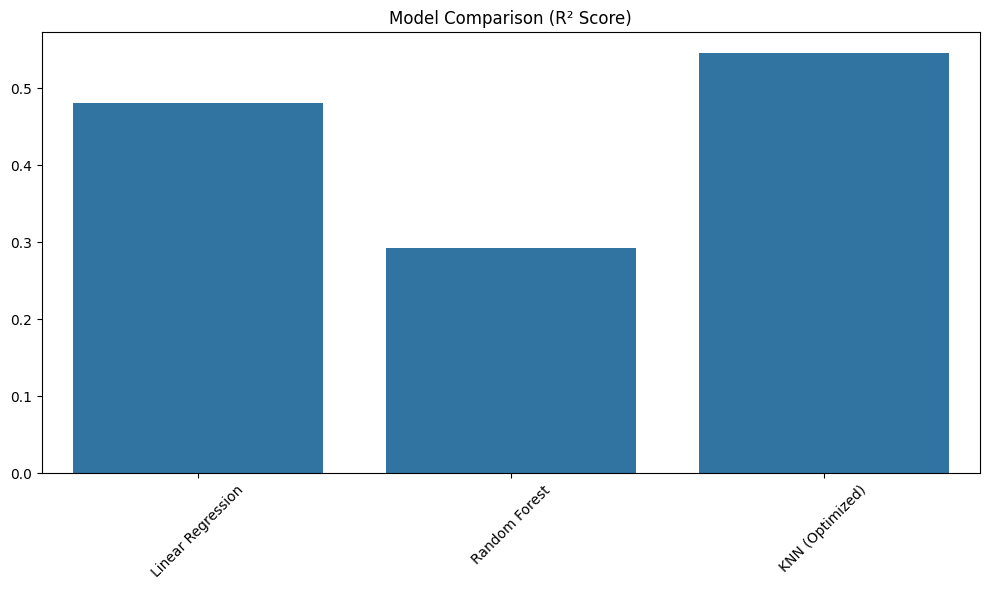

In [26]:


# Plot model comparison
plt.figure(figsize=(10, 6))
models = list(model_results.keys())
scores = list(model_results.values())

sns.barplot(x=models, y=scores)
plt.title('Model Comparison (R² Score)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Conclusions

### 1. The Random Forest model performed best in predicting tips, followed by KNN and Linear Regression.
### 2. The most important features for predicting tips were total bill and party size.
### 3. There are significant differences in tipping patterns across different categories (days, times, etc.).

# Recommendations

### 1. Use the Random Forest model for tip predictions
### 2. Consider party size and total bill as the main factors when estimating tips
### 3. Take into account day and time patterns for better staffing and service planning